## Imports<a id='3.3_Imports'></a>

In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from library1.sb_utils import save_file
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load The Data<a id='3.4_Load_The_Data'></a>

In [18]:
ha_data = pd.read_csv('/Users/sharanaravindh/Desktop/springboard/Github repository/capstone 3 - Heart Attack prediction/Data/hearattack_cleaned.csv')

Age: Numeric (e.g., 52) 

Sex: Categorical (0: Female, 1: Male) 

Chest Pain Type: Categorical (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic) 

Resting Blood Pressure: Numeric (e.g., 125) 

Serum Cholesterol: Numeric in mg/dL (e.g., 212) 

Fasting Blood Sugar: Categorical (0: <= 120 mg/dL, 1: > 120 mg/dL) 

Resting Electrocardiographic Results: Categorical (0: Normal, 1: Abnormality, 2: Hypertrophy) 

Maximum Heart Rate Achieved: Numeric (e.g., 168) 

Exercise-Induced Angina: Categorical (0: No, 1: Yes) 

Oldpeak (ST Depression): Numeric (e.g., 1.0) 

Slope of Peak Exercise ST Segment: Categorical (0: Upsloping, 1: Flat, 2: Downsloping) 

Number of Major Vessels Colored by Fluoroscopy: Numeric (0 to 3) 

Thalassemia: Categorical (0: Normal, 1: Fixed Defect, 2: Reversible Defect)

In [19]:
columns_to_convert = ['sex','chest_pain','rest_ecg','st_slope','thalassemia','exercise_induced_angina','blood_sugar']
ha_data[columns_to_convert] = ha_data[columns_to_convert].astype('category')

In [20]:
ha_data.head()

,age,sex,chest_pain,rest_bp,cholesterol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,vessels_fluroscopy,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [21]:
ha_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1007 non-null   int64   
 1   sex                      1007 non-null   category
 2   chest_pain               1007 non-null   category
 3   rest_bp                  1007 non-null   int64   
 4   cholesterol              1007 non-null   int64   
 5   blood_sugar              1007 non-null   category
 6   rest_ecg                 1007 non-null   category
 7   max_heart_rate           1007 non-null   int64   
 8   exercise_induced_angina  1007 non-null   category
 9   st_depression            1007 non-null   float64 
 10  st_slope                 1007 non-null   category
 11  vessels_fluroscopy       1007 non-null   int64   
 12  thalassemia              1007 non-null   category
 13  target                   1007 non-null   float64 
dtypes: categ

In [22]:
ha_data.describe()

,age,rest_bp,cholesterol,max_heart_rate,st_depression,vessels_fluroscopy,target
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,54.591857,131.567031,246.732870,148.903674,1.088779,0.696127,0.533366
std,9.008239,17.655113,51.618989,23.081532,1.178132,0.943227,0.286076
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.100000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000,0.260000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000,0.700000
75%,61.000000,140.000000,276.000000,165.000000,1.800000,1.000000,0.810000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,0.900000


In [25]:
ha_data = ha_data.rename(columns={'target':'heart_attack_risk'})

### Correlation

I want to explore the correlations betweeen the numerical variables in the dataset, to see if any are correlated with each other

/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_66386/10774338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ha_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)


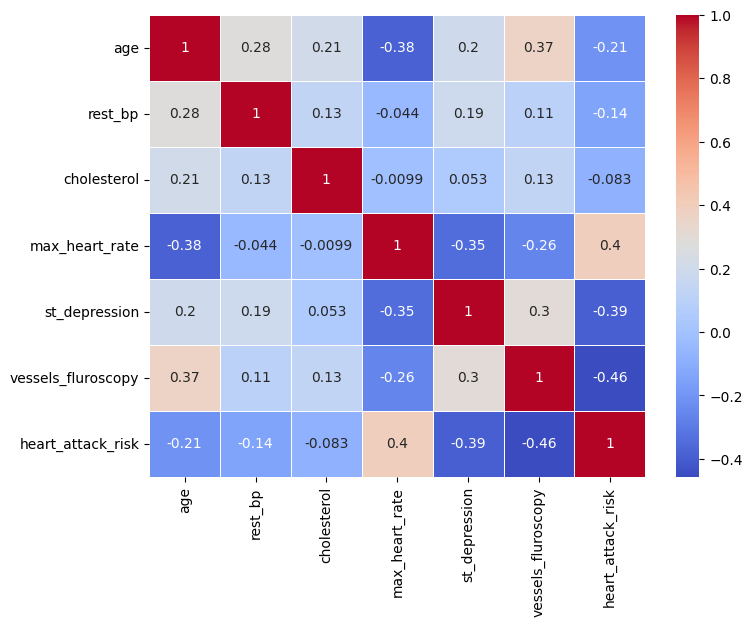

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(ha_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

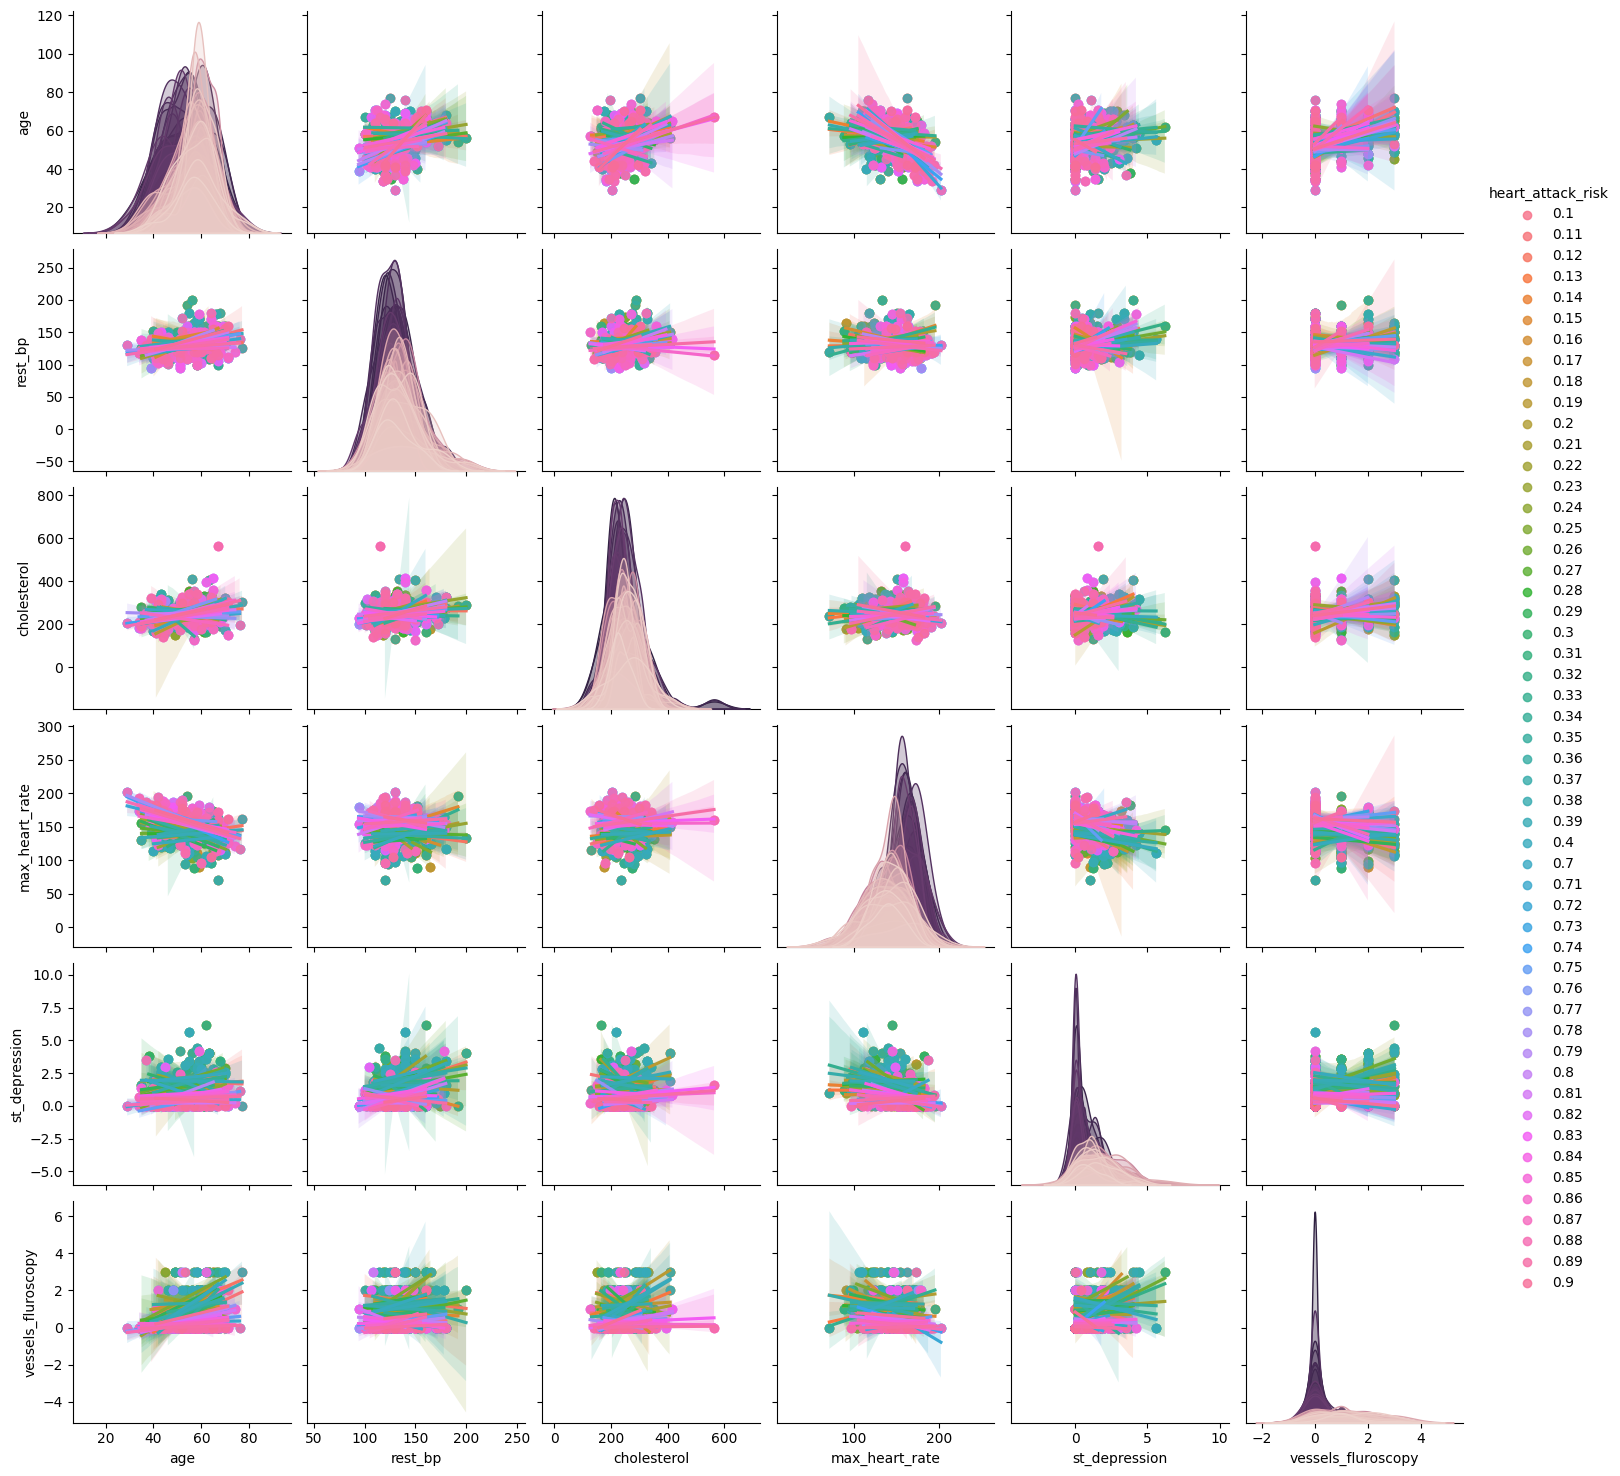

In [48]:
numerical_columns = ha_data.select_dtypes(include=['float','int']).columns

sns.pairplot(ha_data[numerical_columns],kind="reg",hue='heart_attack_risk')
plt.show()

From this heatmap I can see that there are potential stronger correlations between age and the max heartrate, as well as the max_hear rate and st depression. Age and the number of major vessels under fluroscopy is also positively correlated. The heart attack risk variable is most correlated with the number of major vessel seen under fluroscopy, with st_depression, and max_heart_rate. 

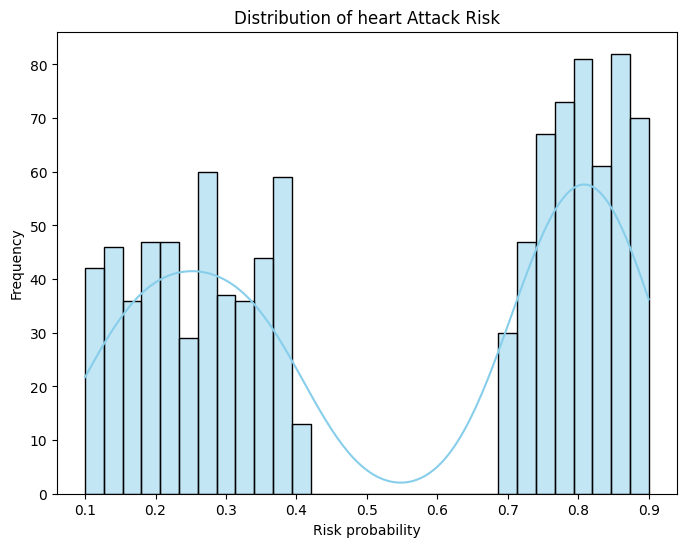

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(ha_data['heart_attack_risk'], bins=30, color='skyblue', edgecolor='black',kde=True)
plt.title('Distribution of heart Attack Risk')
plt.xlabel('Risk probability')
plt.ylabel('Frequency')
plt.show()

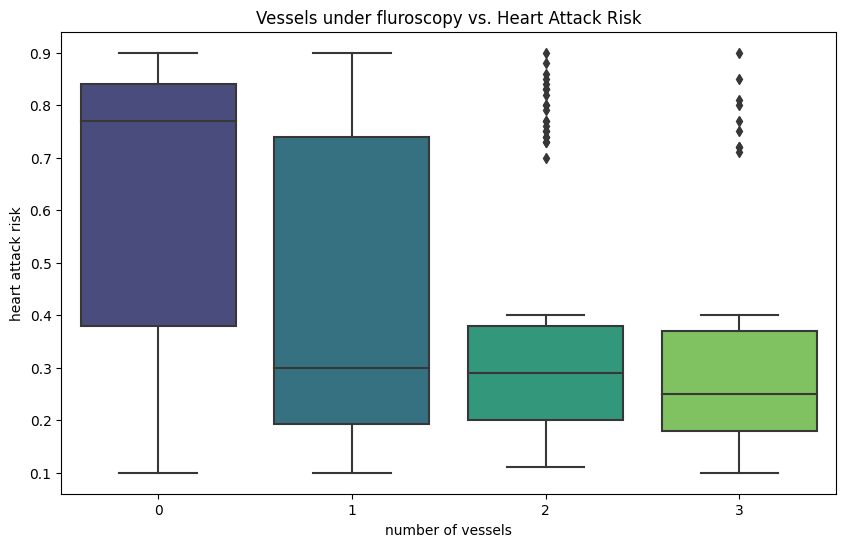

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vessels_fluroscopy', y='heart_attack_risk', data=ha_data, palette='viridis')
plt.xlabel('number of vessels')
plt.ylabel('heart attack risk')
plt.title('Vessels under fluroscopy vs. Heart Attack Risk')
plt.show()

There is a negative correlation between the number of vessels seen under fluroscopy and the risk of heart attack. The more vessels that are seen under fluroscopy the lower the risk of heart attack. 

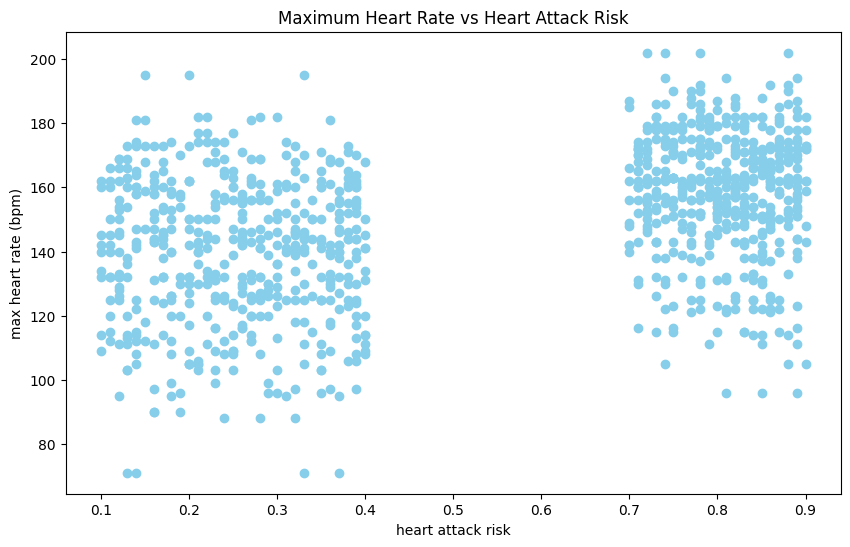

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(ha_data['heart_attack_risk'], ha_data['max_heart_rate'], color='skyblue')
plt.xlabel('heart attack risk')
plt.ylabel('max heart rate (bpm)')
plt.title('Maximum Heart Rate vs Heart Attack Risk')
plt.show()

We can see that higher heart attack risk is associated with an increased presence of maximum heart rate above 140 beats per minute. 

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['numerical_column1'], df['numerical_column2'], color='skyblue')
plt.xlabel('Numerical Column 1')
plt.ylabel('Numerical Column 2')
plt.title('Scatter Plot: Numerical Column 1 vs Numerical Column 2')
plt.show()

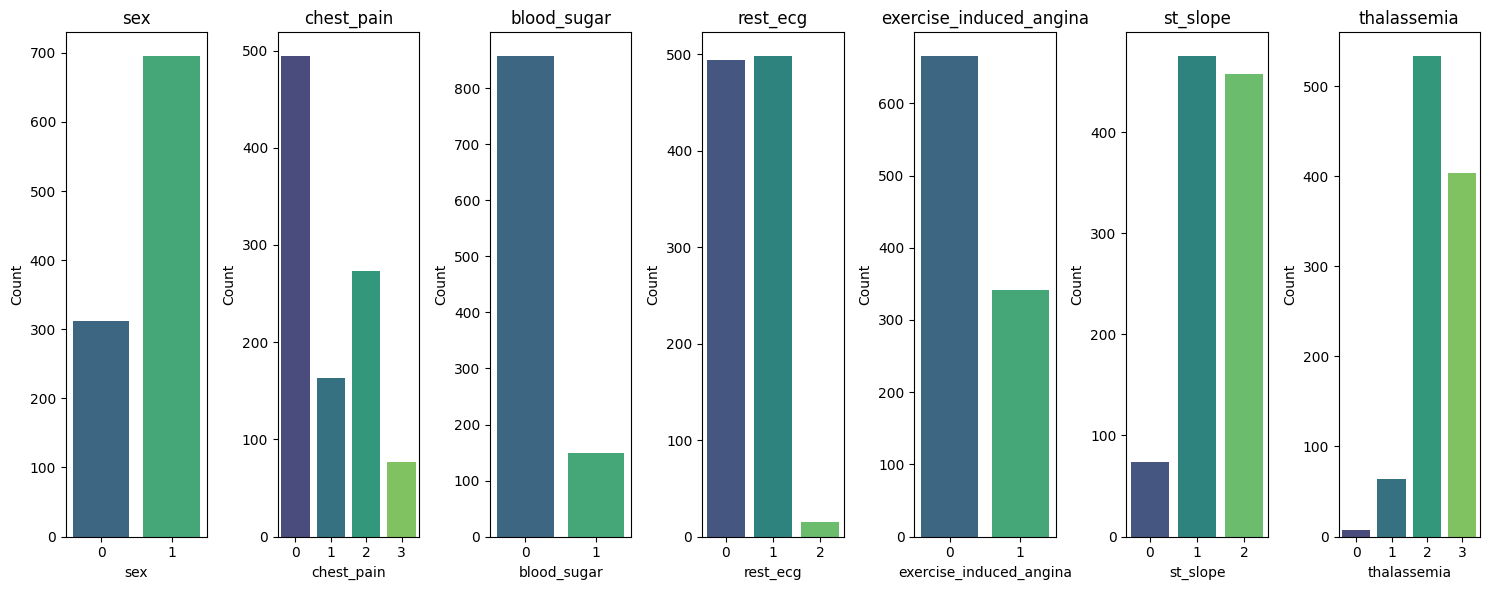

In [40]:
categorical_columns = ha_data.select_dtypes(include='category').columns

num_columns = len(categorical_columns)

plt.figure(figsize=(15,6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, num_columns, i)
    sns.countplot(data=ha_data, x=column, palette='viridis')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Majority of the patients in the dataset are male, without blood sugar, and with reversible thalassemia

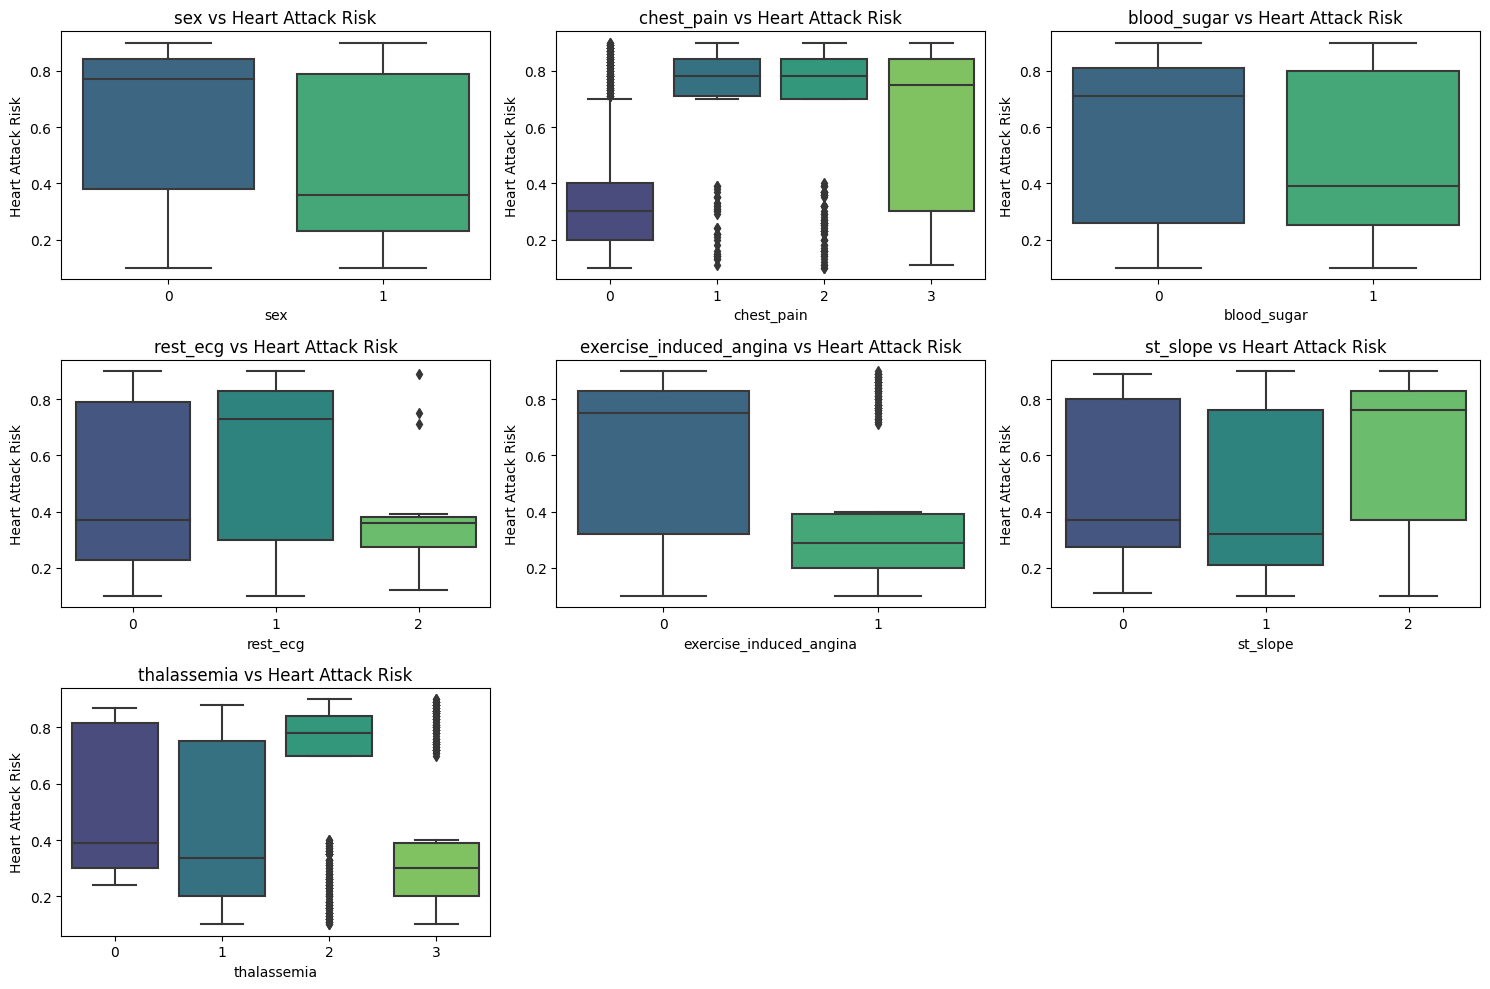

In [41]:
num_rows = len(categorical_columns) // 2
num_cols = 2 if len(categorical_columns) % 2 == 0 else 3

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=column, y='heart_attack_risk', data=ha_data, palette='viridis')
    plt.title(f'{column} vs Heart Attack Risk')
    plt.xlabel(column)
    plt.ylabel('Heart Attack Risk')

plt.tight_layout()
plt.show()

Anginal(1) and non-anginal(2) chest pain show a high risk of heart attack from the box plot. When the Angina is excercise induced there is a lower risk of heart attack. Reversible defect thalassemia has the highest risk rates among the thalassemia types. While the individual variables can explain some of the correlations to heart attack risks, there may multiple correlation, and or underlying factors influencing the rate. For example, a person with blood sugar, and thalassemia may have a higher risk rate of heart attacks.  

## Findings


#### Age and Max Heart Rate:
The correlation between age and maximum heart rate aligns with general physiological understanding. As individuals age, their maximum heart rate tends to decrease. This is a well-known phenomenon in exercise physiology and cardiology.

#### Max Heart Rate and ST Depression:
The correlation between maximum heart rate and ST depression during exercise is clinically relevant. In stress testing (commonly used to assess heart health), a higher heart rate response along with ST depression can indicate potential cardiovascular issues.

#### Age and Number of Major Vessels (Fluoroscopy):

##### Heart Attack Risk Correlations:
1. Number of Major Vessels (Fluoroscopy) and Heart Attack Risk:
This correlation aligns with clinical expectations. A higher number of major vessels with issues (visible under fluoroscopy) is associated with a greater risk of cardiovascular events, including heart attacks.

2. ST Depression and Heart Attack Risk:
Elevated ST depression during exercise is a recognized indicator of myocardial ischemia (insufficient blood supply to the heart). This aligns with the correlation, suggesting that individuals with higher ST depression might be at an increased risk of a heart attack.

3. Max Heart Rate and Heart Attack Risk:
The correlation between maximum heart rate and heart attack risk could indicate that individuals with specific heart rate responses during exercise might have an elevated risk. Abnormal heart rate responses can be indicative of underlying cardiovascular issues.


##### Chest Pain Type:
1. Anginal(1) and Non-Anginal(2) Chest Pain:
Consistent with medical knowledge, Anginal and Non-Anginal chest pain types are associated with a higher risk of heart attack. These types of chest pain can be indicative of coronary artery disease, which may lead to compromised blood flow to the heart.

2. Exercise-Induced Angina:
Exercise-induced angina typically suggests stable angina, where chest pain occurs during physical exertion but is relieved by rest. Individuals with stable angina may have better-managed cardiovascular conditions, contributing to a lower risk of heart attack during exercise.

##### Thalassemia Type:
- Reversible Defect Thalassemia:
Thalassemia is a genetic blood disorder that can affect the production of hemoglobin. The association between reversible defect thalassemia and a higher risk of heart attack could be related to the impact of thalassemia on cardiac function. Individuals with thalassemia may experience complications affecting the heart, contributing to the observed risk.

